In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import classification_report,confusion_matrix,make_scorer,roc_curve,SCORERS,recall_score,precision_score,roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\MUKU\Desktop\Python\Data sets\Personal Projects\Loan candidate classification\dataset_31_credit-g.csv')

In [5]:
df.sample(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
449,'0<=X<200',15,'delayed previously',repairs,1512,'>=1000','1<=X<4',3,'male mar/wid',none,...,'life insurance',61,stores,own,2,skilled,1,none,yes,bad
986,'>=200',42,'no credits/all paid',business,6289,'<100','<1',2,'male div/sep',none,...,'life insurance',33,none,own,2,skilled,1,none,yes,good
484,'no checking',12,'critical/other existing credit','new car',1163,'500<=X<1000','1<=X<4',4,'male single',none,...,'real estate',44,none,own,1,skilled,1,yes,yes,good
313,'0<=X<200',12,'existing paid','new car',685,'<100','4<=X<7',2,'male mar/wid',none,...,car,25,bank,own,1,'unskilled resident',1,none,yes,bad
835,'<0',12,'no credits/all paid','new car',1082,'<100','1<=X<4',4,'male single',none,...,car,48,bank,own,2,skilled,1,none,yes,bad
50,'0<=X<200',24,'delayed previously',furniture/equipment,2333,'no known savings','<1',4,'male single',none,...,'life insurance',29,bank,own,1,'unskilled resident',1,none,yes,good
630,'<0',24,'existing paid',radio/tv,3660,'<100','1<=X<4',2,'female div/dep/mar',none,...,car,28,none,own,1,skilled,1,none,yes,good
65,'no checking',27,'existing paid',repairs,5190,'no known savings','>=7',4,'male single',none,...,'life insurance',48,none,own,4,skilled,2,yes,yes,good
69,'no checking',36,'existing paid',radio/tv,2394,'no known savings','1<=X<4',4,'female div/dep/mar',none,...,car,25,none,own,1,skilled,1,none,yes,good
133,'no checking',18,'existing paid',furniture/equipment,1984,'<100','1<=X<4',4,'male single',none,...,'no known property',47,bank,'for free',2,skilled,1,none,yes,good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null int64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null int64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null int64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null int64
property_magnitude        1000 non-null object
age                       1000 non-null int64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null int64
job                       1000 non-null object
num_dependents            1000 non-null int64
own_telephone             1000 non-null object
foreign_

In [7]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
# code to check if these values are truly numerical or categorical encoded as numerical
cols=df.describe().columns
for col in cols:
    print(col,df[col].nunique())

duration 33
credit_amount 921
installment_commitment 4
residence_since 4
age 53
existing_credits 4
num_dependents 2


In [9]:
#numerical columns
num_cols=['duration','credit_amount','age']
#rest all columns
rest_cols=df.columns[~df.columns.isin(df[num_cols].columns)]

In [10]:
for col in rest_cols:
    print(col,df[col].nunique())

checking_status 4
credit_history 5
purpose 10
savings_status 5
employment 5
installment_commitment 4
personal_status 4
other_parties 3
residence_since 4
property_magnitude 4
other_payment_plans 3
housing 3
existing_credits 4
job 4
num_dependents 2
own_telephone 2
foreign_worker 2
class 2


In [11]:
#removing the target/dependant variable from all the variables.
cat_cols=df[df.columns].iloc[:,:-1].columns

In [56]:
X=pd.get_dummies(df[cat_cols],drop_first=True)
y=df['class'].apply(lambda x:1 if x=='bad' else 0)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
def class_n_conf(model):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    conf_mat=pd.crosstab(y_test, preds, rownames=['Predicted'], colnames=['True'])
    print(str(model).split('(')[0])
    print('\n')
    print(conf_mat)
    print('------------------------------------------------------------------------------------')
    print('\n')

In [71]:
lg=LogisticRegression(random_state=42)
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=1000,random_state=42,max_depth=5,max_features=20)
lda=LinearDiscriminantAnalysis()
qda=QuadraticDiscriminantAnalysis(reg_param=0.001)
svc=SVC(random_state=42,tol=0.0001)
model_list=[lg,gnb,knn,rfc,lda,qda,svc]

In [16]:
for model in model_list:
    (class_n_conf(model))

LogisticRegression


True         0   1
Predicted         
0          208  21
1           54  47
------------------------------------------------------------------------------------


GaussianNB


True         0   1
Predicted         
0          174  55
1           31  70
------------------------------------------------------------------------------------


KNeighborsClassifier


True         0   1
Predicted         
0          195  34
1           81  20
------------------------------------------------------------------------------------


RandomForestClassifier


True         0   1
Predicted         
0          217  12
1           73  28
------------------------------------------------------------------------------------


LinearDiscriminantAnalysis


True         0   1
Predicted         
0          204  25
1           50  51
------------------------------------------------------------------------------------


QuadraticDiscriminantAnalysis


True         0   1
Predicted         
0   

# Understanding the Confusion Matrix:

1) Corrects:
-  True Positives: People we predicted as good and they were actually good.


-  True Negative: People we predicted as bad and they were actually bad.


2) Wrongs:
-  False Positives: People we predicted as bad but are actually good this is also called Type I error.


-  False Negatives: People we predicted as good but are actually bad this is also called Type II error.


<img src="https://miro.medium.com/max/700/1*SAt7oTEaVIsUigtyiJyDJA.png">

## Defining what errors are of importance for our case.

In such a case, one can be linient with making a **Type II error** where a good candidate is not given a loan. Although making a **Type I error** is something to be avoided, as giving a loan to someone(a false negative) who is most likely to default, is taking on an unnecessary risk. Hence we shall be using the model that made the least **Type I error**.

**Note**: Ideally we would like to reduce both these error. As reducing oportunity cost is also an objective.

The **RandomForestClassifier** algorithm gave us the best score as it had the least **Type I error**.

As our main goal is to reduce the **Type I error**.

Classification metrics that take into account the **Type I error** or **False Positive** are as follows:

-  **Specificty** (How often are we correct about classifying the bad candidates)

#### Specificity = True Negatives / (True Negatives+False Positives)

-  **False Positive Rate** (1-Specificity) or (How wrong are we about classifying the bad candidates)

#### False Positive Rate = False Positive / (True Negatives+False Positives)

-  Precision (How Correct are we about classifying the good candidates)

#### Precision = True Positive/(False Positive+True Positive)

The score we would like to increase is **Specificity** as whenever a candidate is considered bad for a loan we would like to correctly classify such candidates.

The only way this score can get higher is by reducing **False Positives**. Hence We use the **Specificity** metric for evaluation.

In [17]:
def specificity(y_true,y_preds):
    tn,fp,fn,tp=confusion_matrix(y_true,y_preds).ravel()
    return tn/(tn+fp)

In [18]:
# calculating sensitivity or recall for all models.
for model in model_list:
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(str(model).split('(')[0])
    print(round(specificity(y_test,preds),3))
    print('\n')

LogisticRegression
0.908


GaussianNB
0.76


KNeighborsClassifier
0.852


RandomForestClassifier
0.948


LinearDiscriminantAnalysis
0.891


QuadraticDiscriminantAnalysis
0.803


SVC
1.0




Support Vector Classifier seems to have performed the best when it comes to making the least mistakes of classifying the bad candidates as good. This is justified by the high Specificity score.

Similarly we can calculate precision as well.

In [19]:
for model in model_list:
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(str(model).split('(')[0])
    print(round(precision_score(y_test,preds),2))
    print('\n')

LogisticRegression
0.69


GaussianNB
0.56


KNeighborsClassifier
0.37


RandomForestClassifier
0.7


LinearDiscriminantAnalysis
0.67


QuadraticDiscriminantAnalysis
0.56


SVC
0.0




Precision is a score we want to increase as well. This basically tells us how  our model did overally and in the context of making the least Type I error.

In this case the RandomForestClassifier performed better as it was able to correctly predict which candidates were actually good compared to the total candidates that were good.

Although the Support Vector Classifier performed "well" in classifying the bad candidates from the good, it more often than not was just assigning most candidates as either good or bad. It isnt really able to discern the true differences. This is due to overfitting.

The SVC model in our case is like a person quick to jump to conclusions without taking the time and effort to do its research. Hence is just simply assigns it as either good or bad, without much thought. This is not something we want in our business to make decisions.

Hence we select the Random Forest Classfier as it performs the best in both regards.

Using the specificty metric. Random Forest Classifier is the model with the highest specificity and hence this shall be the model to use for our purpose. As according to the Random Forest Classifier model we are able to predict the customers that are bad candidates correctly 95% of the time. This is acceptable as we leave only a  5% margin for error.

#### The logic behind classification is essentially to predict probabilities rather than predicting the actual class. For our case if the probability is above 0.5 it is classfied as good candidate and if it is below 0.5 it is a bad candidate.

#### This value 0.5 is essentially a threshold that defines if a candidate is bad or good.

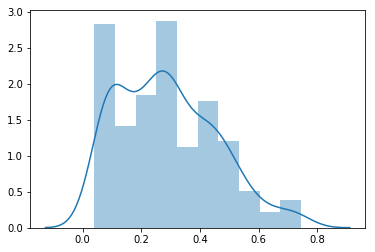

In [20]:
rfc.fit(X_train,y_train)
pred_prob=rfc.predict_proba(X_test)
sns.distplot(pred_prob[:,1])

In the above histogram there is a gradual drop in counts beyond the 0.5 mark. This indicates that most of our classifications were predicted with a probablity of less than 0.5. In our case whenever a a certain observation is assigned a probability of lower than 0.5 we consider it to be a "good"  candidate. We observe  the same in the graph below.

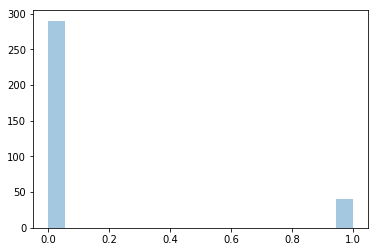

In [21]:
preds=rfc.predict(X_test)
sns.distplot(preds,kde=False)

There are more number of classifications as 0 than that of one. 0 being good and 1 being bad.

When trying to strike the perfect balance we have to look at two metrics:

-  True Positive Rate or Sensitivity: When the prediction is good how often is the prediction correct.

-  True Negative Rate or Specificity: When the prediction is bad how often is the prediction correct.

As we change the threshold value the Sensitivity and Specificity keep changing and they are inversely related to each other.

In [22]:
preds=binarize(pred_prob, 0.6)
# print(pd.crosstab(y_test,preds,rownames=['Predicted'],colnames=['True']))

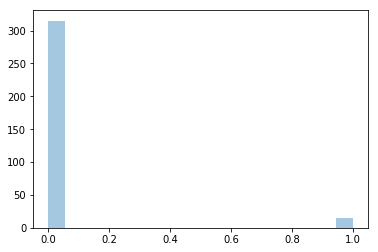

In [23]:
sns.distplot(preds[:,1],kde=False)

In [24]:
specificity(y_test,preds[:,1])

0.982532751091703

In [25]:
pd.crosstab(y_test,preds[:,1],rownames=['Predicted'],colnames=['True'])

True,0.0,1.0
Predicted,,
0,225,4
1,90,11


By changing the threshold value from 0.5 to 0.6 we have essentially made the model "strict" in the sense that it is now gonna produce fewer false positives but instead produce more false negatives. Essentially we would like to find the threshold value that has a harmonious balance between the two. 

### Lets try to use different threshold values and see  how both the scores change accordingly.

Text(0, 0.5, 'Sensitivity')

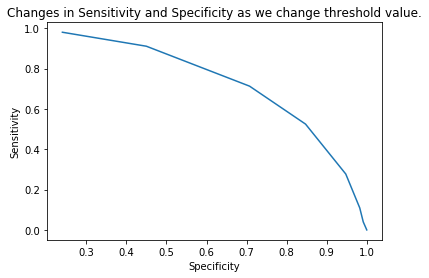

In [26]:
threshold_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
sens=[recall_score(y_test,binarize(pred_prob,thresh)[:,1]) for thresh  in threshold_list]
spec=[specificity(y_test,binarize(pred_prob,thresh)[:,1]) for thresh in threshold_list]
plt.plot(spec,sens)
plt.title('Changes in Sensitivity and Specificity as we change threshold value.')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')

Here we notice that as our sensitivity reduces our specificity increases indicating a inverse realtion between the two.
To plot a similar graph while comparing False Positive Rate and True Positive Rate we use scikit-learns function roc_curve to plot such a graph.

The ROC Curve or Reciever Operating Characteristics Curve is basically a line plotted on a graph showing the relation between specificity and sensitivity. For every threshold that we evaluate the False Positive Rate(1-Specificity) and the True Positive Rate(Sensitivity) is calculated and the points are plotted on a graph.

Note: False Positive Rate is 1-Specificity, so the False Positive Rate(Fall-out Rate) and True Positive Rate(Sensitivity) are directly related.

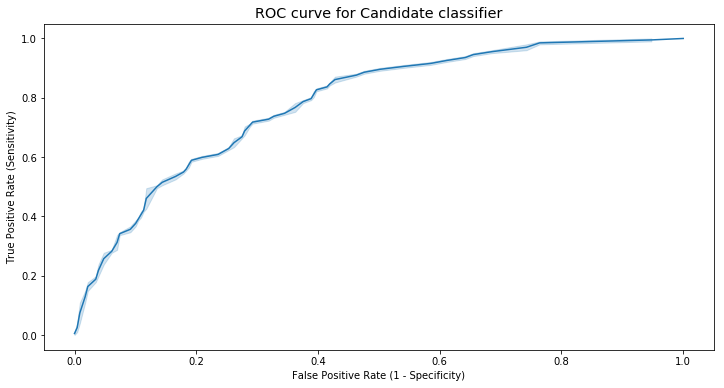

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
plt.figure(figsize=(12,6))
sns.lineplot(fpr, tpr)
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Candidate classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [28]:
thresholds.mean()

0.3539990105861701

Although this shows us how our false positive rate and true positive rate change based on our threshold value. It doesnt tell us the best threshold value. This is a value we would have to decide on based on our business problem.

Ideally for our problem we would need a value with high specificity and low sensitivity, but This is where domain knowledge comes into play. If our "cost" of false positive is high we would want to select a high specificity level of 95% to ensure that costs are at a minimal. Hence we select the corresponding threshold value of a 95% specificity level in our case this threshold value is 0.5.

Although in our case if we consider 95% of our candidates as bad. We would incur a large opportunity cost as now most of the candidates that have a low chance of defaulting are also now considered bad and hence not given a loan. This could be a bad decision for the business. As we have costs with both a high and low specificity level our best option is to select one in the range of 0.3-0.4. As a moderate threshold value.

Coming to the best optimal threshold value can also be converted into optimization problem. Where we try to optimize a function that takes into account both specificity and sensitivity.

Now we know that the most ideal model would have a high specificity value and a high sensitivity too. This would be the most idealistic situation.

If we had to plot a line that touches a point that had both these values quite high, a good indicator would be the area under the line as a measure of a high specificity and high sensitivity.

So essentially if we had a high specificity and sensitivity the area under the curve should be high as well. This becomes a direct measure of our model as it ensures the following:

-  High specificity
-  High sensitivity
-  It is unaffected by huge class imbalances
-  does not require a specified threshold value as it is a measure for all  such threshold values.

In [29]:
print('The area under the curve in percentage of the entire graphs is',round(roc_auc_score(y_test,pred_prob[:,1]),2),'%')

The area under the curve in percentage of the entire graphs is 0.78 %


This essentially how well our model performed irrespective of the threshold value selected.

Cross validating and checking the mean and standard deviation of the Area under the curve.

In [30]:
cross_val_scores=cross_val_score(rfc,X,y,cv=10,scoring='roc_auc')
print('The Mean AUC Score for our model is',round(cross_val_scores.mean(),2),'%','and the standard deviation is',round(cross_val_scores.std(),2))

The Mean AUC Score for our model is 0.78 % and the standard deviation is 0.05


## Visualizing Decision boundaries using the mlextend library.

In [47]:
# First we select the two most important features for our visualizations.
pd.Series(dict(zip(X.columns,rfc.feature_importances_))).sort_values(ascending=False)[0:2]

checking_status_'no checking'    0.157738
credit_amount                    0.124767
dtype: float64

In [88]:
# Segregating them into X_train and y_train while only taking two variables.
X_train=X[["checking_status_'no checking'","credit_amount"]].values
y_train=y.values

In [89]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

lg=LogisticRegression()
lg.fit(X_train,y_train)

gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

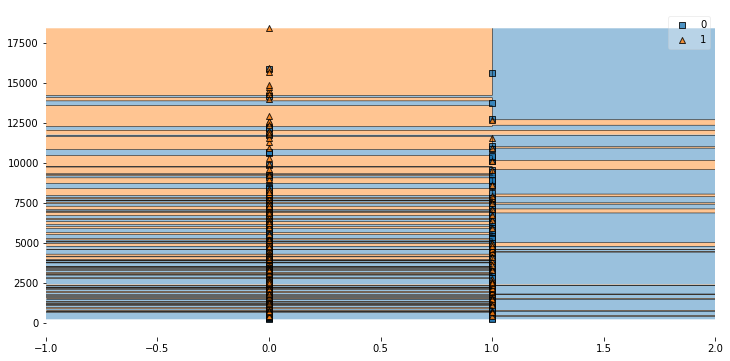

In [100]:
# Visualizations for the Random Forrest Classifier.
plt.figure(figsize=(12,6))
plot_rfc=plot_decision_regions(X=X_train, y=y_train, clf=rfc)

Here we notice that the random forrest classifier tries to segregate every data point perfectly. This shows us that the model is in fact overfitting the data.

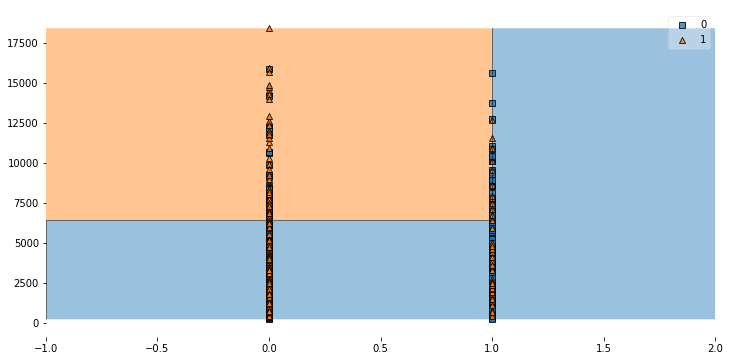

In [101]:
# Visualizations for the Logistic Regression Classifier
plt.figure(figsize=(12,6))
plot_lg=plot_decision_regions(X=X_train, y=y_train, clf=lg)

The Logistic Regression Classifier is more generalizable and doesnt overfit the data.

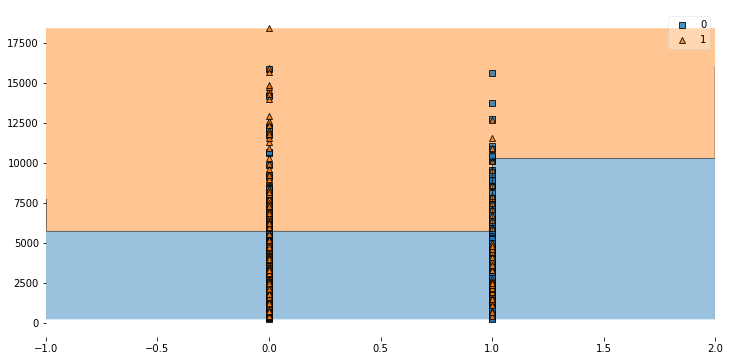

In [99]:
# Visualizations for the GaussianNB Classifier
plt.figure(figsize=(12,6))
plot_gnb=plot_decision_regions(X=X_train, y=y_train, clf=gnb)

The GaussianNB Classifier does a better job than the logistic regression classifier  as it 